In [1]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.chrome.options import Options
import re

In [93]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

In [3]:
codingProfileData = pd.read_csv("coding-profile-data.csv")
codingProfileData

,Email,Name,Codechef,Codeforces,Spoj,Leetcode,Gfg
0,sanchitamishra170676@gmail.com,sanchita,sanchita170676,sanchita170676,sanchita170676,sanchitamishra170676,sanchitamishra170676
1,hemkishan12@gmail.com,Hem Kishan,vyas_7275,hem_7275,hem_7275,hem_7275,hem_7275
2,hanu.2024cs1020@kiet.edu,Hanu agarwal,hanu_30,NaN,NaN,hanuagarwal181,hanu_30
3,ashibh21@gmail.com,Ashish bhatt,ashb21,ashibh,NaN,ashishbhatt,ashibh21
4,shivam.1923ec1084@kiet.edu,Shivam Sharma,shiv0618,shiv3116,NaN,shiv3116,shivashar132001
5,vaishnavi.2024cs1029@kiet.edu,Vaishnavi Sangal,vaishnavi_2308,NaN,NaN,Break_The_Code,vaishnavisangal787
6,garvit.2125csme1002@kiet.edu,Garvit singhal,garvit_47,garvit_singhal,Garvit_singhal,Garvit_singhal,garvitsinghal47
7,aditya.2125cse1127@kiet.edu,Aditya Agnihotri,theadi,theadityaagnihotri,NaN,theadityaagnihotri,theadityaagnihotri
8,garvit.2125cse1150@kiet.edu,Garvit Agarwal,garvit414,garvit414,NaN,garvit414,NaN
9,shubham.2125cse1159@kiet.edu,Shubham Verma,shubh50,shubhambbk50,NaN,shubhambbk50,NaN


In [4]:
codingProfileData.shape

(31, 7)

In [5]:
codingProfileData.columns

Index(['Email', 'Name', 'Codechef', 'Codeforces', 'Spoj', 'Leetcode', 'Gfg'], dtype='object')

In [6]:
codingProfileData.drop_duplicates(inplace = True)

In [7]:
codingProfileData.shape

(31, 7)

In [8]:
platformStats = codingProfileData.shape[0] - codingProfileData.isnull().sum()
platformStats = platformStats.drop(['Email','Name'])
print(platformStats)

Codechef      30
Codeforces    26
Spoj          10
Leetcode      31
Gfg           29
dtype: int64


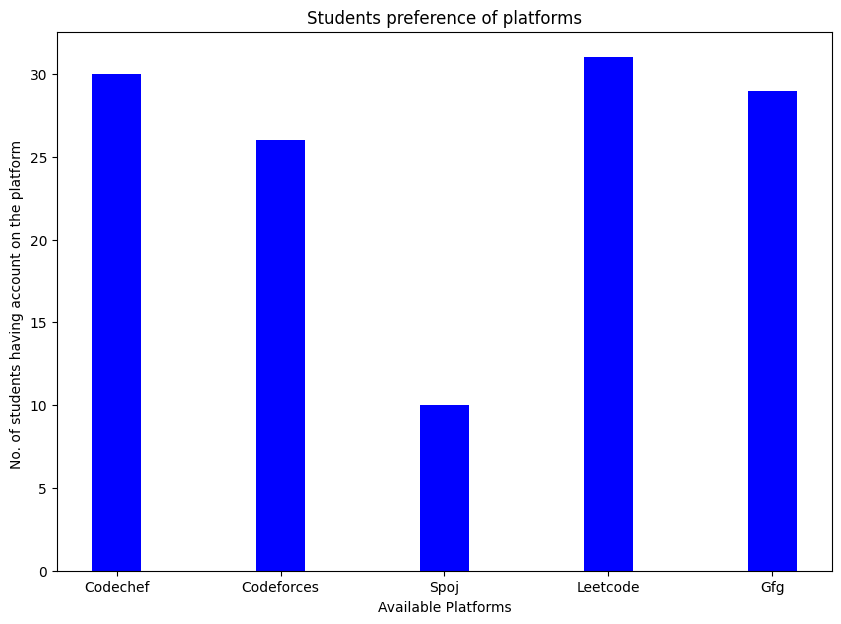

In [9]:
platforms = list(platformStats.keys())
platformUsers = list(platformStats)
fig = plt.figure(figsize = (10, 7))
plt.bar(platforms, platformUsers, color ='blue',
        width = 0.3)
 
plt.xlabel("Available Platforms")
plt.ylabel("No. of students having account on the platform ")
plt.title("Students preference of platforms")
plt.show()

In [10]:
codingProfileData = codingProfileData.replace(np.nan, '')
codingProfileData = codingProfileData.replace('Nothing', '')

In [11]:
profileStatsDataFrame = pd.DataFrame()

In [12]:
class ProfileScraper():
    def __init__(self, name, email, codechef, codeforces, spoj, leetcode, gfg):
#         launch browser in headless state
        options = Options()
        options.add_argument('--headless')
        self.driver = webdriver.Chrome(options=options)
        
        global profileStatsDataFrame
        profileStats = {"name": name, "email": email}
        
        self.profiles = {
            "codechef fully solved": {f"https://www.codechef.com/users/{codechef}": "//h5[contains(text(), 'Fully Solved')]"},
            "codechef partially solved": {f"https://www.codechef.com/users/{codechef}": "//h5[contains(text(), 'Partially Solved')]"},
            "codeforces": {f"https://codeforces.com/profile/{codeforces}": "//div[contains(@class, '_UserActivityFrame_counterValue')]"},
            "spoj": {f"https://www.spoj.com/users/{spoj}/": "//dl[contains(@class, 'profile-info-data')]/dd"},
            "leetcode": {f"https://leetcode.com/{leetcode}/": "//div[contains(@class, 'font-medium text-label-1')]"},
            "gfg": {f"https://auth.geeksforgeeks.org/user/{gfg}/practice": "(//span[contains(@class, 'score_card_value')])[position()=2] "},
        }
        
        totalQuestions = self.getProfileStats(profileStats)
        profileStats["total"] = totalQuestions
#         adding individual's data to global profile stats data frame
        individualProfileStatsDataFrame = pd.DataFrame([profileStats])
        profileStatsDataFrame = pd.concat([profileStatsDataFrame, individualProfileStatsDataFrame], ignore_index=True)
        
    
    def getProfileStats(self, profileStats):
        '''function to scrape the data of user on different platforms, 
        adds the data in profile stats dictionary and returns total questions solved'''
        totalQuestions = 0
        
        for platform, data in self.profiles.items():
            for profile, query in data.items():
                questions = self.runQuery(profile, query)
#                 print(profile, " ", questions, end="\n")
                profileStats.update({platform:questions})
                totalQuestions += int(questions)
        
        return totalQuestions
    
    
    def runQuery(self, profile, query):
        try:
            self.driver.get(profile)
            element = WebDriverWait(self.driver, 5).until(
                EC.presence_of_element_located((By.XPATH, query))
            )
            questions = int(re.search(r'\d+', element.text).group())
            return questions
        except:
            return 0
        


In [13]:
# Iterating through ethe profile data of all individuals
for ind in codingProfileData.index:
    ProfileScraper(codingProfileData.loc[ind,"Email"], codingProfileData.loc[ind,"Name"],codingProfileData.loc[ind,"Codechef"],codingProfileData.loc[ind,"Codeforces"],codingProfileData.loc[ind,"Spoj"],codingProfileData.loc[ind,"Leetcode"],codingProfileData.loc[ind,"Gfg"])
    print(codingProfileData.loc[ind,"Name"])

sanchita
Hem Kishan
Hanu agarwal
Ashish bhatt
Shivam Sharma
Vaishnavi Sangal
Garvit singhal
Aditya Agnihotri
Garvit Agarwal
Shubham Verma
Vaibhav Bisht
Jayant Kumar Gupta 
Gaurav Kumar
Ali Haider
Priyanshu Agarwal
Abhinav
Shivam Sharma
Samyak Jain
Yashveer Singh
Mukul Dixit
Sahil Jain 
Paras Tiwari
Ibtesam Umar Ansari
Abhay Singh
Ankita Jain 
Shifa Rifat
Anukool Kesharwani
Aman Yadav 
Aditya Kumar 
Anugam Jain
Naman Dwivedi


In [59]:
# Data set collected after scrapping
profileStatsDataFrame

,email,name,codechef fully solved,codechef partially solved,codeforces,spoj,leetcode,gfg,total
0,sanchitamishra170676@gmail.com,sanchita,131,4,38,0,136,52,361
1,hemkishan12@gmail.com,Hem Kishan,15,0,377,0,274,88,754
2,hanu.2024cs1020@kiet.edu,Hanu agarwal,61,0,0,0,0,747,808
3,ashibh21@gmail.com,Ashish bhatt,143,1,372,0,0,27,543
4,shivam.1923ec1084@kiet.edu,Shivam Sharma,147,4,155,0,420,79,805
5,vaishnavi.2024cs1029@kiet.edu,Vaishnavi Sangal,132,2,0,0,572,287,993
6,garvit.2125csme1002@kiet.edu,Garvit singhal,48,0,1,0,390,26,465
7,aditya.2125cse1127@kiet.edu,Aditya Agnihotri,20,0,190,0,3,14,227
8,garvit.2125cse1150@kiet.edu,Garvit Agarwal,106,0,11,0,35,9,161
9,shubham.2125cse1159@kiet.edu,Shubham Verma,45,0,69,0,82,9,205


In [15]:
profileStatsDataFrame.to_csv("profile-staistics.csv", index = False)

In [58]:
profileStatsDataFrame = pd.read_csv("profile-staistics.csv")

In [51]:
count = (profileStatsDataFrame['spoj'] != 0).sum()
print(count)

2


In [52]:
questionStats = profileStatsDataFrame.drop(['name','email','total'], axis = 1)

In [53]:
platform  = []
usersInteracting = []
for column_name in questionStats:
    count = (profileStatsDataFrame[column_name] != 0).sum()
    platform.append(column_name)
    usersInteracting.append(count)
    print(column_name, count)

codechef fully solved 30
codechef partially solved 14
codeforces 25
spoj 2
leetcode 28
gfg 29


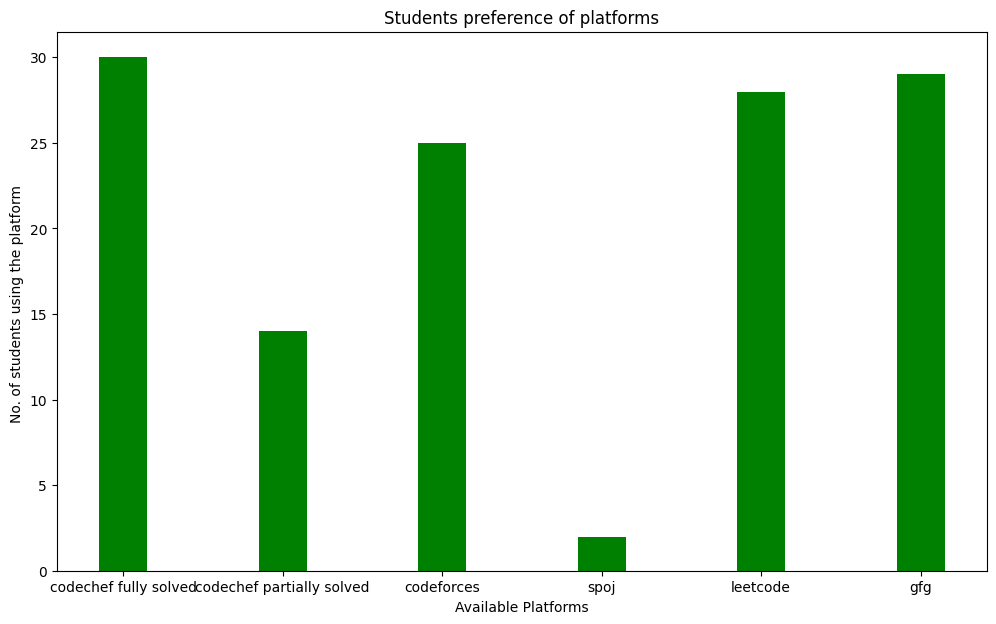

In [54]:
fig = plt.figure(figsize = (12, 7))
plt.bar(platform, usersInteracting, color ='green',
        width = 0.3)
plt.xlabel("Available Platforms")
plt.ylabel("No. of students using the platform ")
plt.title("Students preference of platforms")
plt.show()

In [20]:
meanQuestionsSolved = []
for column_name in questionStats:
    mean = profileStatsDataFrame[column_name].mean()
    meanQuestionsSolved.append(mean)
    print(column_name, mean)

codechef fully solved 114.41935483870968
codechef partially solved 1.967741935483871
codeforces 179.16129032258064
spoj 0.06451612903225806
leetcode 280.0
gfg 132.83870967741936


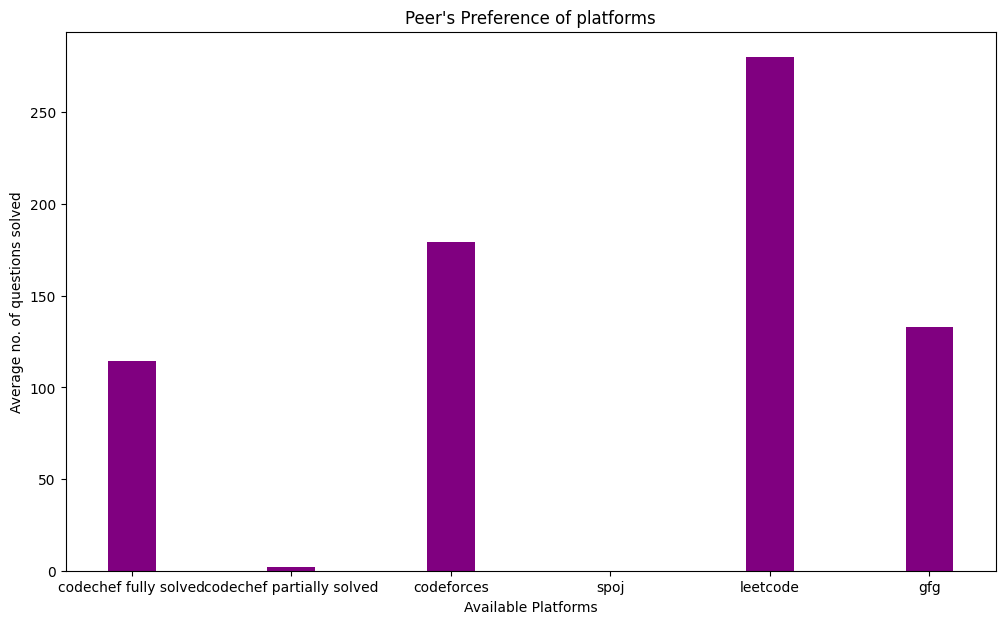

In [21]:
fig = plt.figure(figsize = (12, 7))
plt.bar(platform, meanQuestionsSolved, color ='purple',
        width = 0.3)
plt.xlabel("Available Platforms")
plt.ylabel("Average no. of questions solved")
plt.title("Peer's Preference of platforms")
plt.show()

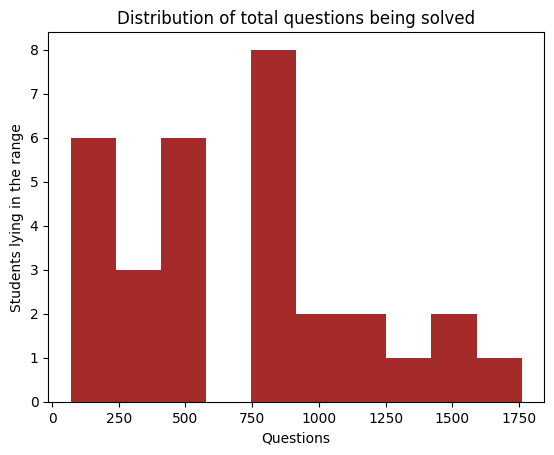

In [22]:
totalQuestionsSeries = profileStatsDataFrame["total"]
plt.hist(totalQuestionsSeries, color="brown")
plt.xlabel("Questions")
plt.ylabel("Students lying in the range")
plt.title("Distribution of total questions being solved")
plt.show() 


0      361
1      754
2      808
3      543
4      805
5      993
6      465
7      227
8      161
9      205
10     560
11    1440
12    1760
13     437
14     270
15     225
16     844
17     827
18     797
19    1406
20    1514
21     982
22     477
23    1237
24     528
25     151
26    1133
27     874
28      70
29     360
30     748
Name: total, dtype: int64


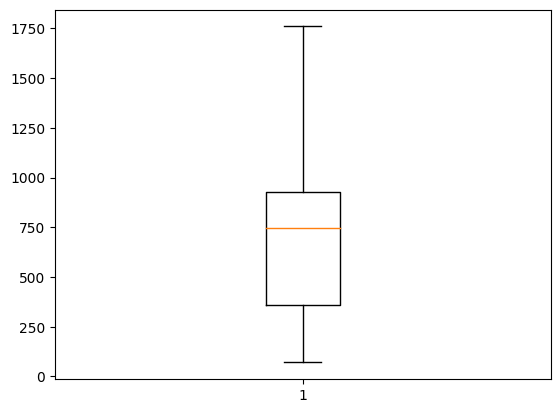

<Figure size 1000x700 with 0 Axes>

In [24]:
print(totalQuestionsSeries)
plt.boxplot(totalQuestionsSeries)
fig = plt.figure(figsize =(10, 7))
plt.show()

In [37]:
# Outlier range
q1 = np.quantile(totalQuestionsSeries, 0.25)
q3 = np.quantile(totalQuestionsSeries, 0.75)
med = np.median(totalQuestionsSeries)
iqr = q3-q1

upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(f"iqr = {iqr}, upper bound = {upper_bound}, lower bound = {lower_bound}")

totalExcludingOutliers = totalQuestionsSeries[(totalQuestionsSeries >= lower_bound) & (totalQuestionsSeries <= upper_bound)]
outliers = totalQuestionsSeries[(totalQuestionsSeries <= lower_bound) | (totalQuestionsSeries >= upper_bound)]
print(f"Data without outliers:\n {totalExcludingOutliers} \n Outliers:\n {outliers}")

iqr = 567.5, upper bound = 1779.25, lower bound = -490.75
Data without outliers:
 0      361
1      754
2      808
3      543
4      805
5      993
6      465
7      227
8      161
9      205
10     560
11    1440
12    1760
13     437
14     270
15     225
16     844
17     827
18     797
19    1406
20    1514
21     982
22     477
23    1237
24     528
25     151
26    1133
27     874
28      70
29     360
30     748
Name: total, dtype: int64 
 Outliers:
 Series([], Name: total, dtype: int64)


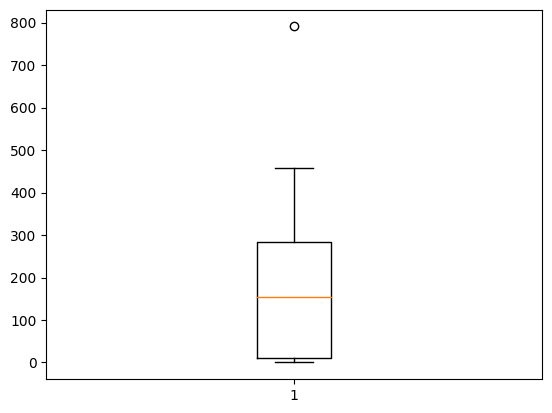

<Figure size 1000x700 with 0 Axes>

In [35]:
# Outliers for codeforces
plt.boxplot(profileStatsDataFrame["codeforces"])
fig = plt.figure(figsize =(10, 7))
plt.show()

In [96]:
totalMeanQuestions = totalExcludingOutliers.mean()
print(totalMeanQuestions)
totalStdQuestions = totalExcludingOutliers.std()
print(totalStdQuestions)

708.4516129032259
444.307914154863


##### Individual Analysis


In [63]:
userEmailID = "sanchitamishra170676@gmail.com"


In [69]:
profileStatsDataFrame.index = list(profileStatsDataFrame["email"])
userTotal = profileStatsDataFrame.loc[userEmailID]['total']

if userTotal - totalMeanQuestions < 0:
    print(f"you are {abs(userTotal - totalMeanQuestions)} questions behind the average of all students")
else:
    print(f"you are {userTotal - totalMeanQuestions} questions ahead of the mean of all students")

you are 347.45161290322585 questions behind the average of all students


In [80]:
profileStatsDataFrame['Percentile Rank'] = profileStatsDataFrame.total.rank(pct = True)
userPercentile = profileStatsDataFrame.loc[userEmailID]['Percentile Rank']
print(f"You are ahead of {userPercentile * 100} percentile of students in the batch.")

You are ahead of 29.03225806451613 percentile of students in the batch.


In [84]:
profileStatsDataFrame['z-score'] = stats.zscore(list(profileStatsDataFrame["total"]))
userZScore = profileStatsDataFrame.loc[userEmailID]['z-score']
print(f"Your z-score is: {userZScore}")

Your z-score is: -0.7949329566484882


codechef fully solved
codechef partially solved
codeforces
spoj
leetcode
gfg


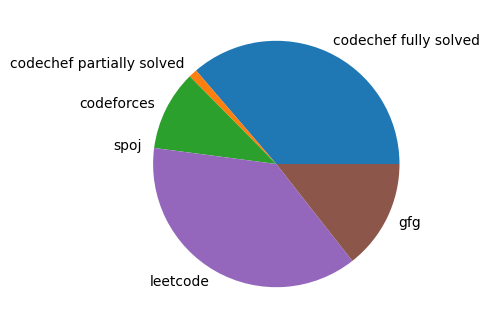

In [92]:
userPlatformsData = []
platformData = []
for column_name in questionStats:
    print(column_name)
    platformData.append(column_name)
    userPlatformsData.append(profileStatsDataFrame.loc[userEmailID][column_name])

fig = plt.figure(figsize =(5, 4))
plt.pie(userPlatformsData, labels = platformData)
plt.show()

In [160]:
platform  = []
usersInteracting = []
for column_name in questionStats:
    count = (profileStatsDataFrame[column_name] != 0).sum()
    platform.append(column_name)
    usersInteracting.append(count)

In [167]:
platformPreference = {
    'Platforms' : platform,
    'Users' : usersInteracting
}
platformPreferenceDataFrame = pd.DataFrame(platformPreference)
platformPreferenceDataFrame = platformPreferenceDataFrame.sort_values('Users',ascending=False)
RankingOrder = ["Percentile Rank"]
RankingOrder = RankingOrder + (list(platformPreferenceDataFrame["Platforms"]))
print("Ranking Order is: ",RankingOrder)
profileStatsDataFrame.sort_values(by = RankingOrder ,ascending=False,inplace=True)
profileStatsDataFrame["name"]

Ranking Order is:  ['Percentile Rank', 'codechef fully solved', 'gfg', 'leetcode', 'codeforces', 'codechef partially solved', 'spoj']


gaurav.2024it1106@kiet.edu               Gaurav Kumar
sj2394108@gmail.com                       Sahil Jain 
jayant.2024cse1207@kiet.edu       Jayant Kumar Gupta 
mukuldixit2782@gmail.com                  Mukul Dixit
abhaysingh002001@gmail.com                Abhay Singh
anukool76kesharwani@gmail.com      Anukool Kesharwani
vaishnavi.2024cs1029@kiet.edu        Vaishnavi Sangal
parastiwari556@gmail.com                 Paras Tiwari
amanyadav23421@gmail.com                  Aman Yadav 
python7370@gmail.com                    Shivam Sharma
samyak.2024it1039@kiet.edu                Samyak Jain
hanu.2024cs1020@kiet.edu                 Hanu agarwal
shivam.1923ec1084@kiet.edu              Shivam Sharma
yashveer.2024cse1062@kiet.edu          Yashveer Singh
hemkishan12@gmail.com                      Hem Kishan
naman.2024csit1064@kiet.edu             Naman Dwivedi
vaibhav.2125cs1119@kiet.edu             Vaibhav Bisht
ashibh21@gmail.com                       Ashish bhatt
ankitajain632003@gmail.com  